<a href="https://colab.research.google.com/github/EisaacJC/Uk-CoursesMaterial./blob/main/DeepLearningII_Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Celdas de inicialización.

In [ ]:
%%capture
!pip install ucimlrepo
!pip install warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# Deep Learning II: Optimización de hiperparámetros, regularización y otras técnicas.

Bienvenido a la tercera semana de tu curso de Aprendizaje Profundo II en Universidad UK, a lo largo de esta semana verás el contenido temático correspondiente a los siguientes temas:

> Add blockquote



	* Metaheurísticas en la IA:
		* Variaciones de la topología de la red.
		* Topologías usadas para diversos problemas (Teórico)
	* Alternativas en la optimización (Estado del arte.)
		* Algoritmos con metaheuristicas.
		* Algoritmos genéticos.

Esta libreta es la libreta que se usará para las clases a lo largo del curso, puedes verlo como las notas del curso, estarán disponibles para ti al finalizar cada semana y podrás acceder a ellas directamente desde tu Classroom o desde el enlace a Github que te compartiré por el mismo.

Al finalizar la toma de clases semanal tendrás disponible en tu Classroom una actividad que consistirá de los siguientes elementos


	* Actividad 3:
		* Variaciones de la topología de la red.
		* Uso de un AG simple para el ajuste de la topología.

En esta semana el contenido teórico y práctico está más compacto y favorece que esta semana esté más relajada y así puedas enfocarte en tu proyecto final.

De esta manera y conforme a los lineamientos de la rúbrica que estarán disponibles en tus evaluaciones podrás llevar a cabo la acreditación de tu curso.

Para dudas y aclaraciones contáctate con tu instructor o con tú coach académico.

# Metaheurísticas en la IA.



## Variaciones de la topología de la red.


### Las redes neuronales como grafos.
Antes de comenzar a describir los conceptos de topologías de red es importante conocer de manera un poco más abstracta como es que las redes neuronales se representan, si bien usualmente no prestamos atención a los detalles teóricos en esta ocasión abordaremos el concepto de grafo de manera previa a hablar de la topología y estructura de las redes.

### ¿Qué es un grafo?

En el área de matemáticas y ciencias de la computación nos referimos a un grafo al conjunto de vértices(nodos) unidos por enlaces que tienen como nombre aristas o arcos. de manera formal podemos decir que un grafo es un par $G=(V,E)$ donde:


*   $V$ es un conjunto de vértices o nodos.
*   $E$ es un conjunto de aristas o arcos que mantienen una relación sobre los nodos.



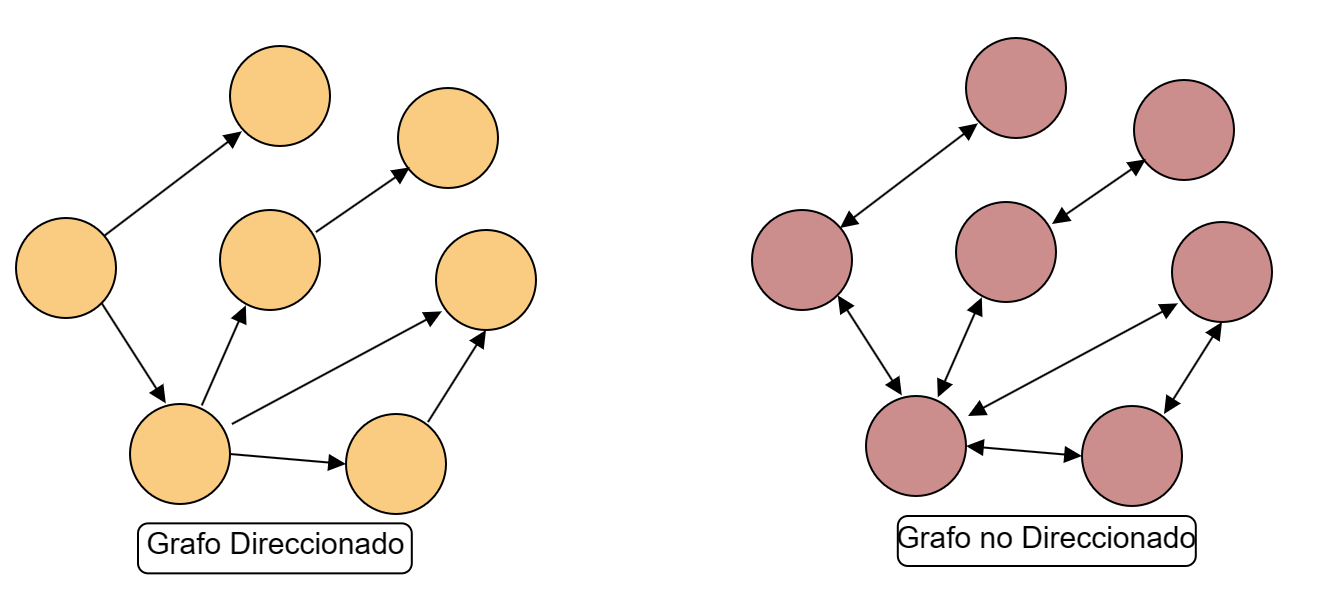

## Enlaces de posible interés para estudiar el uso de grafos en diversas áreas:

* Una propuesta para el modelado del contagio de COVID-19 basado en agentes:

https://www.wolframcloud.com/obj/covid-19/Published/Agent-Based-Networks-Models-for-COVID-19.nb

* Modelado basado en agentes para la simulación de servicios de taxi:

 https://upcommons.upc.edu/bitstream/handle/2117/76720/16869196.pdf

* Un artículo acerca de las redes espectrales, muestra experimentalmente como es posible aprender capas convolucionales:

 https://arxiv.org/pdf/1312.6203.pdf

* Una review acerca del uso de grafos en aprendizaje profundo: https://arxiv.org/pdf/1912.12693.pdf


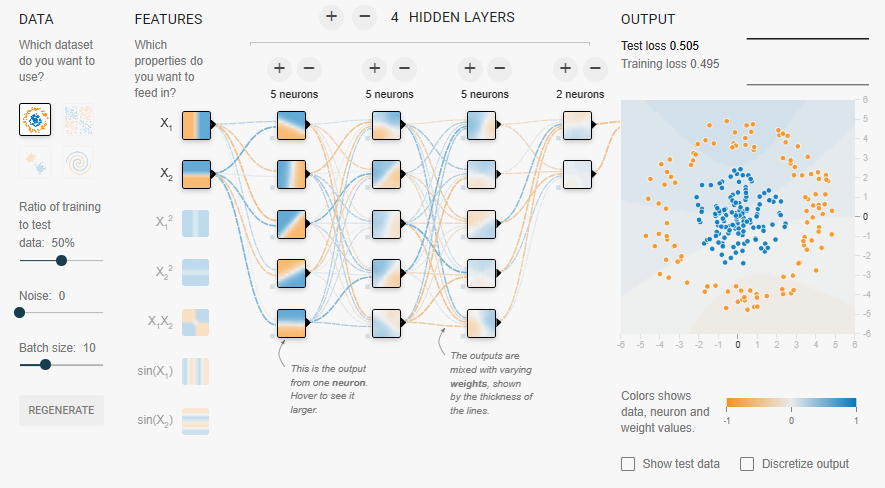

Si te das cuenta en este caso la representación de las redes neuronales pareciera directa, en este caso las aristas serían las conexiones entre las neuronas y las neuronas serían los vértices o nodos, esto nos permite relacionar las propiedades de los grafos directamente con las de las redes neuronales.

La profundidad de una red neuronal se puede medir por la longitud del camino más largo desde la capa de entrada hasta la capa de salida en el grafo correspondiente. La conectividad de una red neuronal se puede analizar estudiando las propiedades del grafo, como el grado de los nodos (número de conexiones entrantes y salientes) y la densidad del grafo (proporción de conexiones existentes en relación con el número máximo posible).

En una red neuronal, la información fluye desde la capa de entrada hacia la capa de salida a través de las conexiones entre las neuronas. Este flujo de información se puede modelar como un recorrido en el grafo correspondiente, donde la información se propaga a lo largo de las aristas del grafo

### ¿Por qué esto puede ser importante?

De manera intuitiva podemos pensar en que si variamos la forma que tiene una red neuronal podemos conseguir distintos resultados, pero ¿acaso esto no es equivalente a considerar que estamos adaptando un grafo?

Esta consideración será la que nos de entrada a hablar de las arquitecturas de red.

En este sentido podemos definir a una red neuronal como el patrón de conexiones y organización entre distintas capas y neuronas.

Observa que esto es equivalente a "cambiar" el grafo.


*   Redes feedforward: En este caso las conexiones se crean desde la capa de entrada a la de salida sin conexiones que regresen entre capas.
*   RNN(Redes Neuronales Recurrentes): Estas son redes neuronales usadas en una gran variedad de aplicaciones, sobre todo en donde los datos son subsecuentes, como en las series de tiempo y el tracking de vídeos.
*   CNN(Redes Neuronales Convolucionales): Estas redes neuronales son ampliamente utilizadas en el procesamiento de imágenes pues aprovechan patrones espaciales mediante conexiones entre capas.
*   DBN (Redes de Creencias Profundas): Estas son redes compuestas por múltiples redes simples apiladas.



En este curso solo aprenderás los conceptos básicos de las mismas, pero contarás con recursos externos para profundizar en los temas, sin embargo, contarás con material suficiente para llevar a cabo el uso de implementaciones para problemas de interés. Ten en cuenta que esta área es un área en constante desarrollo, así que siempre procura consultar los recursos más actuales.

## Redes Feedforward.

* Propagación hacia adelante: La información fluye en una sola dirección, desde la capa de entrada, a través de las capas ocultas, hasta la capa de salida, sin conexiones que regresen.
* Estructuras en capas: Están organizadas en capas: capa de entrada, una o más capas ocultas, y la capa de salida.
Cada neurona en una capa está conectada a todas las neuronas de la capa siguiente.


* No hay conexiones entre neuronas de la misma capa.
* Entrenamiento típicamente por backpropagation: Se propaga hacia atrás el error para ajustar los pesos.
Perceptrón multicapa: Un tipo básico de red feedforward completamente conectada.
* Redes convolucionales: Variedades de redes feedforward que usan convoluciones en lugar de producto escalar.
Aplicaciones: Clasificación, regresión, procesamiento de señales, visión por computadora, etc.

Feedforward neural network. (2024, March 7). In Wikipedia. https://en.wikipedia.org/wiki/Feedforward_neural_network

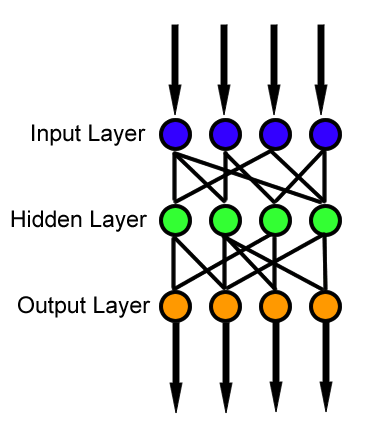

### Redes Neuronales Recurrentes
* Conexiones recurrentes: Tienen bucles de realimentación donde las conexiones se dirigen de una capa hacia atrás a sí misma o a capas anteriores, creando ciclos.
* Permiten procesamiento secuencial: Manejan secuencias de datos como texto, habla, series temporales, etc.
* Memoria interna: Pueden recordar información previa para influir en la salida actual.
* Comparten parámetros a través del tiempo: Los mismos pesos se aplican a cada elemento de la secuencia.
* Problemas con el desvanecimiento/explosión de gradientes:
* Difícil entrenar períodos largos.

* Variantes:

    * LSTM (Long Short-Term Memory): Controlan mejor los flujos de información a largo plazo.
    
    * GRU (Gated Recurrent Unit): Variante más simple y rápida que LSTM.


Aplicaciones:
* Procesamiento de lenguaje natural, traducción automática, reconocimiento de voz, análisis de series temporales.
En resumen, las RNN incorporan conexiones recurrentes que permiten el procesamiento secuencial y la capacidad de manejar dependencias temporales, a diferencia de las redes feedforward estándar.

Recurrent neural network. (2024, April 5). In Wikipedia. https://en.wikipedia.org/wiki/Recurrent_neural_network
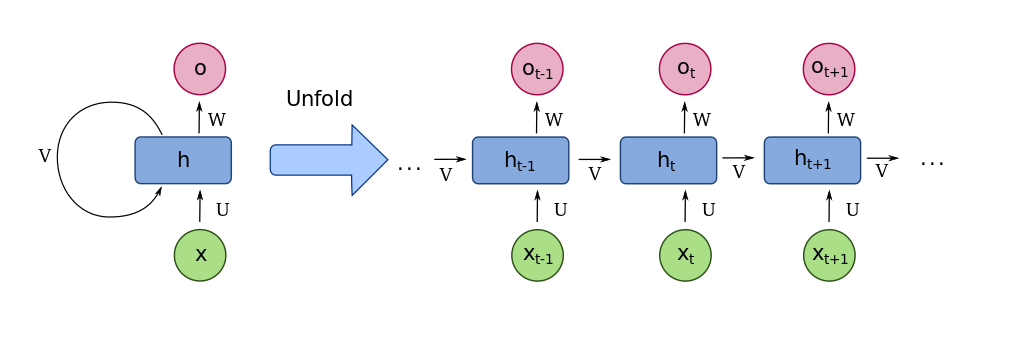

## Una aplicación de las RNN para la predicción de series de tiempo financieras.

## Consulta de series de tiempo.

In [ ]:
#Importando librerías
import yfinance as yf
import numpy as np
import random

In [ ]:
#Seleccionando el/los datos a los cuales vamos a acceder.
tickerData = yf.Ticker("AAPL")
# Extrayendo los datos de
tickerDf = tickerData.history(period='max', start='2010-1-1', end='2023-11-14')


El método tickerData toma los siguientes parámetros:
- period: Es el periodo de tiempo a partir del cual vas a extraer datos.
- interval: es la frecuencia de los datos que quieres extraer.
    - 1m "un minuto"
    - 1h "una hora"
    - 1d "un día"
- start y end: corresponde a la decha de los datos que quieres extraer YYYY-MM-DD
- group_by: La frecuencia con la que quieres agrupar los datos.
    - 1d
    - 1wk
    - 1mo

In [ ]:
df=tickerData.history(period="max", interval="1d")
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


El tipo de datos que arroja el método tickerData.history(params) es un dataframe,una estructura de datos comunmente usada para llevar a cabo análisis de datos de manera sencilla debido a que permite llevara cabo pre procesamiento de datos de manera sencilla, de igual manera también este proceso nos arroja un dataframe con estructuras de datos en las columnas bien determinadas.

In [ ]:
#Podemos ver qué tipo de datos tienen las columnas con:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10825 entries, 1980-12-12 00:00:00-05:00 to 2023-11-17 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10825 non-null  float64
 1   High          10825 non-null  float64
 2   Low           10825 non-null  float64
 3   Close         10825 non-null  float64
 4   Volume        10825 non-null  int64  
 5   Dividends     10825 non-null  float64
 6   Stock Splits  10825 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 676.6 KB


In [ ]:
#Para poder observar el nombre de las columnas podemos usar:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
#Para consultar una columna simplemente utilizamos el nombre
#de la misma.
df["Close"]

Date
1980-12-12 00:00:00-05:00      0.099319
1980-12-15 00:00:00-05:00      0.094137
1980-12-16 00:00:00-05:00      0.087228
1980-12-17 00:00:00-05:00      0.089387
1980-12-18 00:00:00-05:00      0.091978
                                ...    
2023-11-13 00:00:00-05:00    184.800003
2023-11-14 00:00:00-05:00    187.440002
2023-11-15 00:00:00-05:00    188.009995
2023-11-16 00:00:00-05:00    189.710007
2023-11-17 00:00:00-05:00    189.690002
Name: Close, Length: 10825, dtype: float64

## Graficando nuestra primer serie de tiempo financiera

- Definición de series de tiempo y sus componentes.
- Ejemplos de series de tiempo financieras.
- Estacionariedad y tendencias.
- Visualización de datos temporales.

In [ ]:
import matplotlib.pyplot as plt #Librería estándar para llevar a cabo visualizaciones
import seaborn as sns #Librería que permite llevar a cabo gráficas sencillas

Text(0.5, 1.0, 'Valor del stock: APPLE')

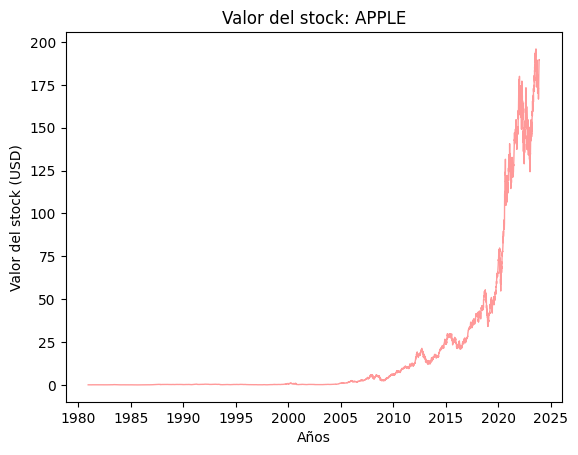

In [ ]:
plt.plot(df["Close"], c="red", linewidth=1,alpha=0.4)
#Al tener nuestros datos importados con el índice en formato de DateTime
#nuestra serie de tiempo ahora muestra el eje x como años.
plt.xlabel("Años")
plt.ylabel("Valor del stock (USD)")
plt.title("Valor del stock: APPLE")

### Problemáticas de la gráfica anterior.
- La escala del valor del stock no permite llevar a cabo comparaciones justas en los cambios del valor.
- Los cambios en periodos de tiempo pequeños no se ven reflejados.
- La distribución de los valores no permite extraer información de la serie de tiempo.

## Concepto de Histograma

Objetivo: Describir cuáles son los valores más comunes, es decir, los que tienen más probabilidad de suceder.

Un histograma es una descripción gráfica que permite observar la frecuencia de ocurrencia de un valor.

En el eje x se tienen los valores y en el eje y la frecuencia con los que estos suceden.


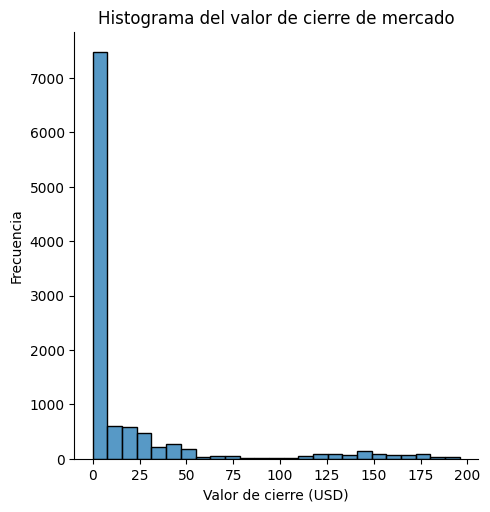

In [ ]:

sns.displot(data=df["Close"], kind="hist", bins=25)
#Uno puede modificar los nombres de los ejes usando los métodos de matplotlib
#esto permite simplificar la edición de la representación visual
plt.ylabel("Frecuencia")
plt.xlabel("Valor de cierre (USD)")
plt.title("Histograma del valor de cierre de mercado")
plt.show()

En este caso es importante ver que el número de "bins" o segmentos determina en gran medida el comportamiento de la gráfica
1.   Una gran cantidad de segmentos no describirá de manera adecuada la distribución de los datos.(sobre ajuste)
2.   Una poca cantidad de segmentos causará que la distribución tampoco sea reconocible.

**Notas importantes:**


*   La frecuencia es proporcional a la probabilidad de hallar ese valor.
*   Existen distintos tipos de gráficos.
    - "hist" lleva a cabo un histograma típico.
    - "kde" estima la densidad de probabilidad.
    - "ecdf" estima la la función de distribución acumulativa.





\

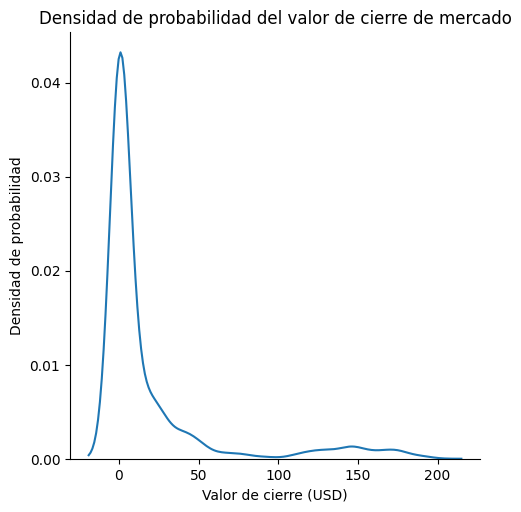

In [ ]:
sns.displot(data=df["Close"], kind="kde")
#Uno puede modificar los nombres de los ejes usando los métodos de matplotlib
#esto permite simplificar la edición de la representación visual
plt.ylabel("Densidad de probabilidad")
plt.xlabel("Valor de cierre (USD)")
plt.title("Densidad de probabilidad del valor de cierre de mercado")
plt.show()

In [ ]:
sns.displot(data=df["Close"], kind="ecdf")
#Uno puede modificar los nombres de los ejes usando los métodos de matplotlib
#esto permite simplificar la edición de la representación visual
plt.ylabel("Proporción")
plt.xlabel("Valor de cierre (USD)")
#plt.title("Densidad acumulativa del valor de cierre de mercado")
plt.show()

NameError: name 'df' is not defined

## ¿Cómo se ven estos puntos aleatorios?
-  Visualización del histograma

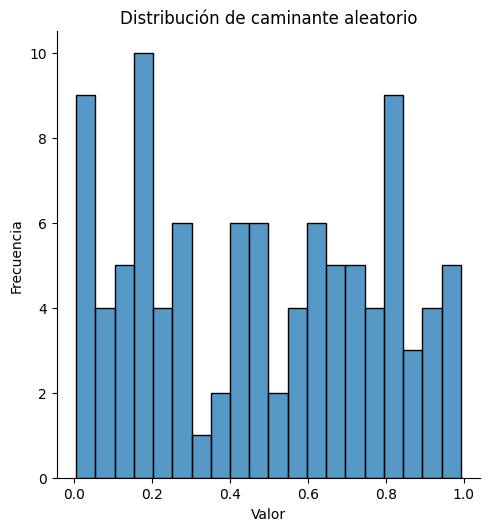

In [ ]:
sns.displot(random_points, kind="hist", bins=20)
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.title("Distribución de caminante aleatorio")
plt.show()

## Hablemos de otras escalas.
La escala logaritmica y semilogarimica.

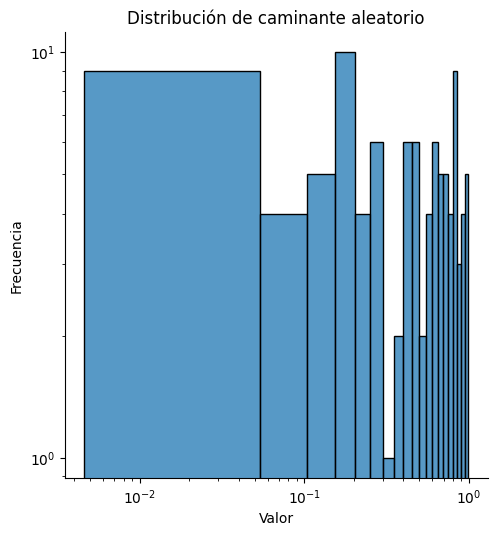

In [ ]:
sns.displot(np.sort(random_points), kind="hist", bins=20)
plt.ylabel("Frecuencia")
plt.xlabel("Valor")
plt.title("Distribución de caminante aleatorio")
plt.xscale("log")
plt.yscale("log")
plt.show()

# Las series de tiempo deben considerarse estacionarias bajo la hipótesis del mercado financiero.

Una forma de hacer esto es calculando los retornos o retornos logarítmicos:
$$R(t)=\frac{S(t)-S(t-1)}{S(t)}$$
$$R(t)= \log{\frac{S(t)}{S(t-1)}}=\log S(t)- \log S(t-1)$$

In [ ]:
def retorno(data):
    listaretorno=[]#Creo una lista vacía
    for idx in range(len(data)-1):
        listaretorno.append((data[idx+1]-data[idx])/data[idx+1])
    return np.asarray(listaretorno, dtype="f")

In [ ]:
def retorno_log(data):
    listaretorno=[]#Creo una lista vacía
    for idx in range(len(data)-1):
        listaretorno.append(np.log(data[idx+1])-np.log(data[idx]))
    return np.asarray(listaretorno, dtype="f")

# Estudiaremos ahora la volatilidad del sistema

* Una buena aproximación para la volatilidad de una serie de tiempo son las desviaciones estándar.
* Este cálculo suele hacerse mediante el cálculo por ventanas.


$$\sigma = \frac{1}{N } \sum (S_i-\mu)^2$$

In [ ]:
#Volatilidad
def sigma(data):
    #N es el número total de los datos
    N=len(data)
    return (1/N) *(np.sum(data-np.mean(data)))**2

In [ ]:
def volatilidad(datos, periodo):
    windowingsigma2=[]
    for idx in range(len(datos)-periodo):
        windowingsigma2.append(sigma(datos[idx:idx+periodo]))
    return np.asarray(windowingsigma2)

In [ ]:
tickerDf.index.values[1:]

array(['2010-01-05T05:00:00.000000000', '2010-01-06T05:00:00.000000000',
       '2010-01-07T05:00:00.000000000', ...,
       '2023-11-09T05:00:00.000000000', '2023-11-10T05:00:00.000000000',
       '2023-11-13T05:00:00.000000000'], dtype='datetime64[ns]')

## ¿Son tan distintos los retornos de los retornos logarítmicos?

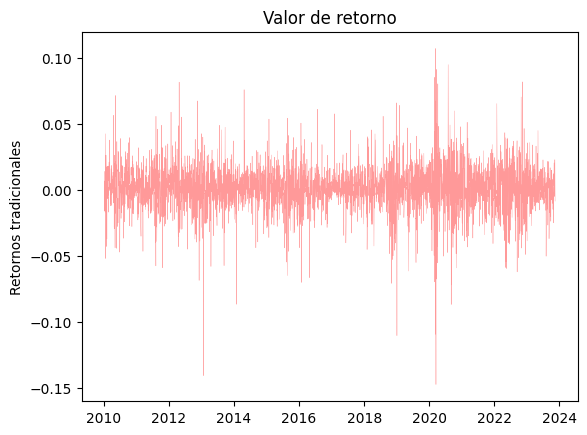

In [ ]:
plt.plot(tickerDf.index.values[1:],retorno(tickerDf["Close"]), c="r", alpha=0.4, linewidth=0.3)
plt.ylabel("Retornos tradicionales")
plt.title("Valor de retorno")
plt.show()

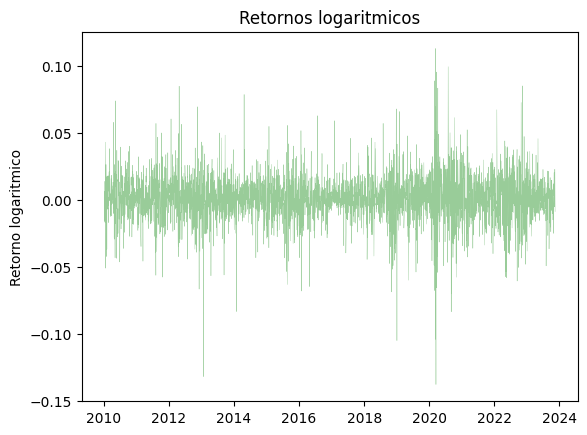

In [ ]:
plt.plot(tickerDf.index.values[1:],retorno_log(tickerDf["Close"]), c="g", alpha=0.4, linewidth=0.3)
plt.ylabel("Retorno logaritmico")
plt.title("Retornos logaritmicos")
plt.show()

Text(0.5, 1.0, 'Histograma de retornos logarítmicos')

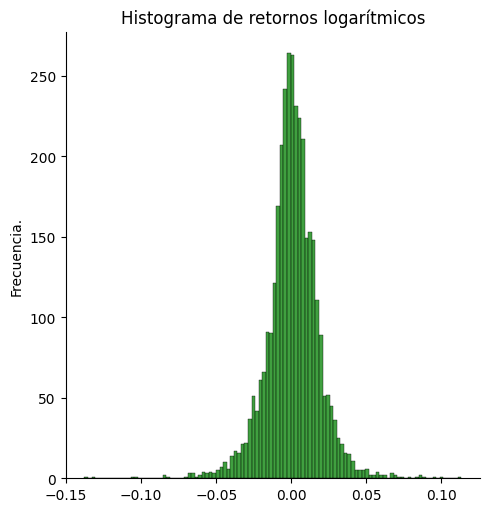

In [ ]:
# Distribución de los valores de los retornos
sns.displot(retorno_log(tickerDf["Close"]), kind="hist", color="g")
plt.ylabel("Frecuencia.")
plt.title("Histograma de retornos logarítmicos")

In [ ]:
#Estadísticas descriptivas:
rl=retorno_log(tickerDf["Close"])
print(f"El promedio de la distribución es: {np.mean(rl)}")
print(f"La desviación estándar de la distribución es: {np.std(rl)}")

El promedio de la distribución es: 0.0009603635407984257
La desviación estándar de la distribución es: 0.017837049439549446


### Observemos que es totalmente distinto de la distribución de valores originales.

* ¿Distribución de pareto?

## Graficando la volatilidad

Text(0.5, 1.0, 'Volatilidad de los LogReturns')

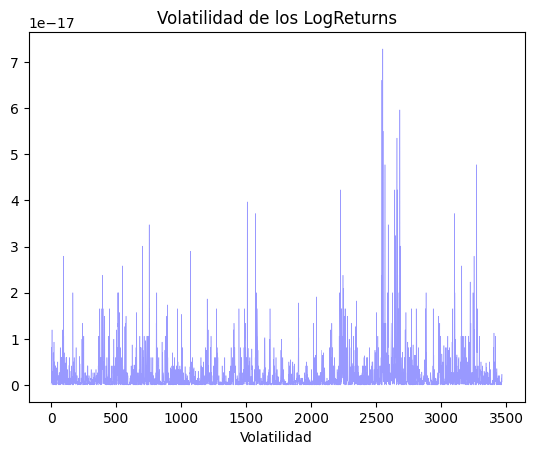

In [ ]:
plt.plot(volatilidad(retorno_log(tickerDf["Close"]),21), c="b", alpha=0.4, linewidth=0.4)
plt.xlabel("Volatilidad")
plt.title("Volatilidad de los LogReturns")

## Otra aproximación conveniente es en términos de los valores absolutos al cuadrado de los retornos logarítmicos


Text(0.5, 1.0, 'Volatilidad de los LogReturns Segunda interpretación.')

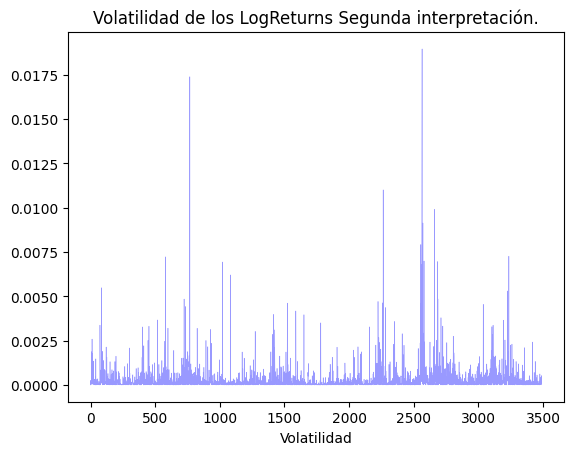

In [ ]:
plt.plot(np.abs(retorno_log(tickerDf["Close"]))**2, c="b", alpha=0.4, linewidth=0.4)
plt.xlabel("Volatilidad")
plt.title("Volatilidad de los LogReturns Segunda interpretación.")

# Una aproximación por medio de los modelos lineales

## Verificar funcionamiento

In [ ]:
%%capture
!pip install statsmodels

In [ ]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Función para visualizar la serie temporal y sus autocorrelaciones
def visualizar_datos(serie_temporal):
    # Graficar la serie temporal
    plt.figure(figsize=(12, 6))
    plt.plot(serie_temporal)
    plt.title('Serie Temporal')
    plt.show()

    # Graficar autocorrelación y autocorrelación parcial
    plot_acf(serie_temporal, lags=40)
    plt.title('Autocorrelación')
    plt.show()

    plot_pacf(serie_temporal, lags=40)
    plt.title('Autocorrelación Parcial')
    plt.show()

In [ ]:
# Función para realizar la prueba de estacionariedad
def prueba_estacionariedad(serie_temporal):
    resultado_prueba = adfuller(serie_temporal)
    p_valor = resultado_prueba[1]

    if p_valor <= 0.05:
        print(f'La serie temporal es estacionaria (p-valor: {p_valor:.4f})')
    else:
        print(f'La serie temporal NO es estacionaria (p-valor: {p_valor:.4f})')

In [ ]:
# Función para ajustar un modelo SARIMA y realizar predicciones
def ajustar_modelo_sarima(serie_temporal):
    # Dividir la serie temporal en entrenamiento y prueba
    longitud_entrenamiento = int(len(serie_temporal) * 0.8)
    serie_entrenamiento = serie_temporal[:longitud_entrenamiento]
    serie_prueba = serie_temporal[longitud_entrenamiento:]

    # Ajustar un modelo SARIMA
    orden = (1, 1, 1, 7)  # Parámetros p, d, q, y estacionalidad (en este caso, semanal)
    modelo = SARIMAX(serie_entrenamiento, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
    resultado_modelo = modelo.fit(disp=False)

    # Realizar predicciones en el conjunto de prueba
    predicciones = resultado_modelo.get_forecast(steps=len(serie_prueba))

    # Graficar resultados
    plt.figure(figsize=(12, 6))
    plt.plot(serie_entrenamiento, label='Entrenamiento')
    plt.plot(serie_prueba, label='Prueba')
    plt.plot(predicciones.predicted_mean, label='Predicciones', color='red')
    plt.title('Modelo SARIMA - Serie Temporal y Predicciones')
    plt.legend()
    plt.show()

In [ ]:
# Cargar y preprocesar la serie temporal
serie_temporal = retorno_log(tickerDf["Close"]) #cargar_datos()

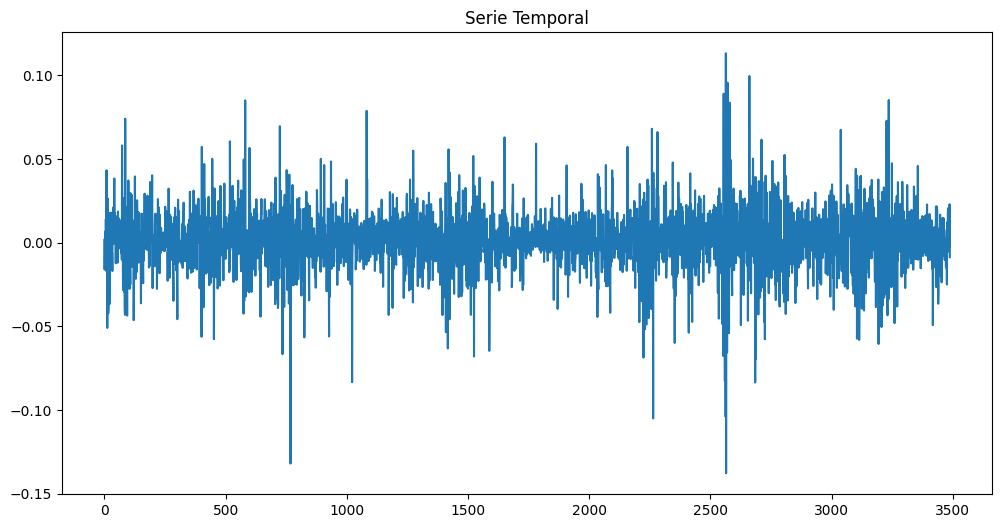

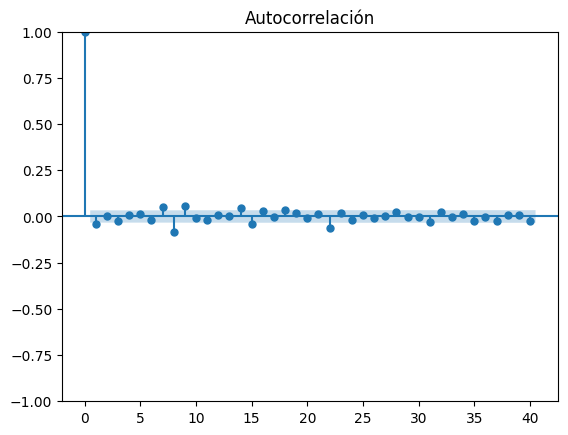

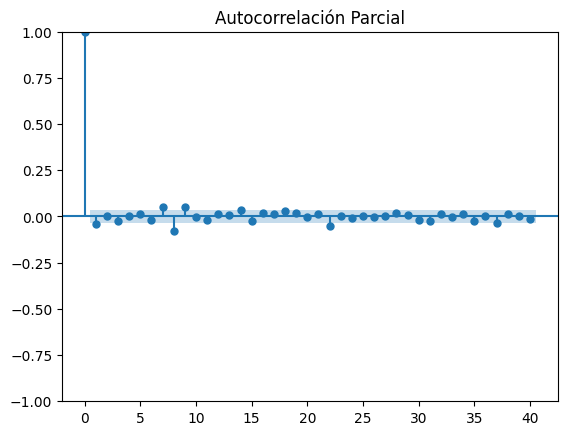

In [ ]:
# Visualizar la serie temporal y sus autocorrelaciones
visualizar_datos(serie_temporal)

In [ ]:
# Realizar prueba de estacionariedad
prueba_estacionariedad(serie_temporal)

La serie temporal es estacionaria (p-valor: 0.0000)


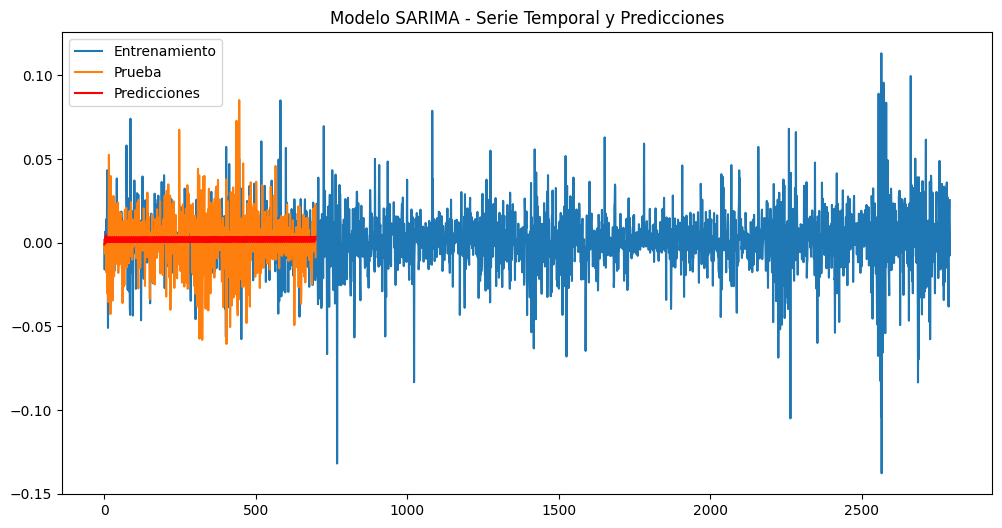

In [ ]:
# Ajustar modelo SARIMA y realizar predicciones
ajustar_modelo_sarima(serie_temporal)

Cargar Datos:

- La función cargar_datos() genera datos simulados para la serie temporal. Puedes reemplazar esto con la carga de tus propios datos.
Visualizar Datos:

- La función visualizar_datos() grafica la serie temporal y sus funciones de autocorrelación y autocorrelación parcial.
Prueba de Estacionariedad:

- La función prueba_estacionariedad() realiza la prueba de Dickey-Fuller aumentada para evaluar la estacionariedad de la serie temporal.
Ajustar Modelo SARIMA:

- La función ajustar_modelo_sarima() ajusta un modelo SARIMA a la serie temporal, utilizando parte de los datos como conjunto de entrenamiento y realizando predicciones en el conjunto de prueba.
Este ejemplo utiliza datos simulados y un modelo SARIMA básico. Ajusta los parámetros según tus necesidades y el conjunto de datos real.



* Hipótesis Nula (H0): La serie temporal tiene una raíz unitaria y, por lo tanto, no es estacionaria.

* Hipótesis Alternativa (H1): La serie temporal no tiene una raíz unitaria y es estacionaria.

Interpretación del Valor p:

* Si el valor p es menor que un umbral (como 0.05), se rechaza la hipótesis nula, indicando estacionariedad.
Si el valor p es mayor que el umbral, no se puede rechazar la hipótesis nula, lo que sugiere no estacionariedad.]

## Un modelo de IA para esto:
- ¿Qué tan útil es?

In [ ]:
%%capture
!pip install numpy pandas matplotlib scikit-learn tensorflow


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [ ]:

# Cargar y visualizar datos
serie_temporal =tickerDf["Close"]
# Normalizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
serie_normalizada = scaler.fit_transform(serie_temporal.values.reshape(-1, 1))

# Función para crear conjuntos de datos para entrenamiento
def crear_datos_entrenamiento(datos, lag=1):
    X, y = [], []
    for i in range(len(datos)-lag):
        X.append(datos[i:(i+lag), 0])
        y.append(datos[i+lag, 0])
    return np.array(X), np.array(y)

In [ ]:
# Crear conjuntos de entrenamiento y prueba
lag = 3
X, y = crear_datos_entrenamiento(serie_normalizada, lag)

# Dividir en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

In [ ]:

# Reshape para que sea compatible con la entrada de la red LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Crear modelo LSTM
modelo = Sequential()
modelo.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
modelo.add(LSTM(units=50))
modelo.add(Dense(units=1))
modelo.compile(optimizer='sgd', loss='mean_squared_error')

In [ ]:
# Entrenar el modelo
modelo.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
88/88 [==============================] - 12s 16ms/step - loss: 0.0209
Epoch 2/100
88/88 [==============================] - 1s 15ms/step - loss: 0.0175
Epoch 3/100
88/88 [==============================] - 1s 13ms/step - loss: 0.0174
Epoch 4/100
88/88 [==============================] - 1s 16ms/step - loss: 0.0173
Epoch 5/100
88/88 [==============================] - 2s 17ms/step - loss: 0.0171
Epoch 6/100
88/88 [==============================] - 1s 14ms/step - loss: 0.0170
Epoch 7/100
88/88 [==============================] - 1s 13ms/step - loss: 0.0169
Epoch 8/100
88/88 [==============================] - 1s 14ms/step - loss: 0.0168
Epoch 9/100
88/88 [==============================] - 2s 21ms/step - loss: 0.0167
Epoch 10/100
88/88 [==============================] - 2s 19ms/step - loss: 0.0166
Epoch 11/100
88/88 [==============================] - 2s 23ms/step - loss: 0.0164
Epoch 12/100
88/88 [==============================] - 2s 22ms/step - loss: 0.0163
Epoch 13/100
88/88 [====

In [ ]:
# Realizar predicciones
predicciones = modelo.predict(X_test)
predicciones = scaler.inverse_transform(predicciones)

22/22 [==============================] - 1s 3ms/step


Mean Squared Error: 1338.2122683654677


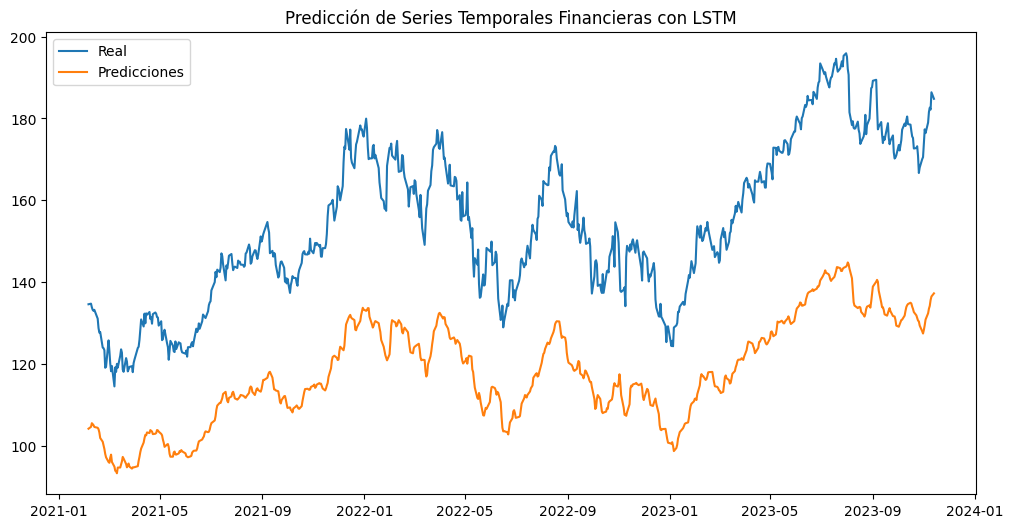

In [ ]:
# Desnormalizar datos de prueba
y_test_desnormalizado = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test_desnormalizado, predicciones)
print(f'Mean Squared Error: {mse}')

# Visualizar resultados
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal.index[train_size+lag:], y_test_desnormalizado, label='Real')
plt.plot(serie_temporal.index[train_size+lag:], predicciones, label='Predicciones')
plt.title('Predicción de Series Temporales Financieras con LSTM')
plt.legend()
plt.show()

## Redes Neuronales Convolucionales.
* Convoluciones: Utilizan la operación de convolución en lugar de la multiplicación escalar general. Aplicando un kernel/filtro que se desplaza sobre la entrada para detectar características.
* Capas convolucionales: Realizan convoluciones para extraer características de los datos de entrada, típicamente imágenes.
* Submuestreo/Pooling: Reducen la resolución espacial para reducir costo computacional. Max pooling es común.


* Arquitectura feedforward: No tienen conexiones recurrentes, la información fluye hacia adelante.

* Capas totalmente conectadas al final: Después de las convoluciones, tienen capas densas estándar.
Comparten pesos: Los kernels se comparten en diferentes regiones de la imagen, reduciendo parámetros.

* Invariancia traslacional: Detectan la misma característica sin importar su posición en la imagen.
Aplicaciones exitosas: Visión por computadora, reconocimiento de objetos, clasificación de imágenes, entre otras.

Convolutional neural network. (2024, April 13). In Wikipedia. https://en.wikipedia.org/wiki/Convolutional_neural_network

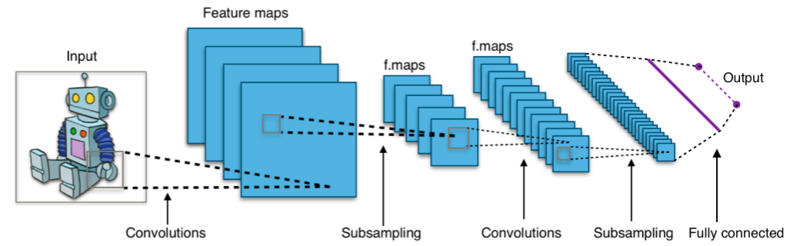

## Aplicación de las redes neuronales para un problema de clasificación

Esta es una modificación del tutorial dispuesto en Pytorch para el uso con un conjunto de datos en particular.

Se deja en el mismo estado que la implementación original por cuestiones de acreditación a los autores.
https://pytorch.org/hub/pytorch_vision_resnet/

In [ ]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
import pandas as pd
cudnn.benchmark = True
from PIL import Image
import cv2
plt.ion()

In [ ]:
!wget https://raw.githubusercontent.com/EisaacJC/CNN--Worms-Prediction/main/folder_creation.sh
!chmod a+x folder_creation.sh
!./folder_creation.sh

--2024-04-15 10:46:20--  https://raw.githubusercontent.com/EisaacJC/CNN--Worms-Prediction/main/folder_creation.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 208 [text/plain]
Saving to: ‘folder_creation.sh’

folder_creation.sh  100%[===================>]     208  --.-KB/s    in 0s      

2024-04-15 10:46:20 (4.55 MB/s) - ‘folder_creation.sh’ saved [208/208]



Aquí necesitarás tener descargado en tu entorno el siguiente conjuntro de imágenes.

https://drive.google.com/drive/folders/1NMzreA2lL3Yu32I4AlPCwzv8TuG3E8gp?usp=sharing

Este artículo puede ser de interés para el estudiantado.
https://arxiv.org/pdf/1512.03385.pdf

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
def save_data(dataset,kind):
    df=pd.read_csv(dataset)
    train=df.sample(frac=0.8)
    test=df.sample(frac=0.2)
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    if kind=="train":
        pathf="train"
        dataset=train
    elif kind=="test":
        dataset=test
        pathf="val"
    else:
        print("Solo puedes poner las opciones train y val")
    ds=dataset
    for i in range(len(ds)):
        img =cv2.imread("/content/drive/MyDrive/WormImages/"+ds.at[i,"File"],0)
        img=cv2.equalizeHist(img)
        if ds.at[i,"Status"]=="alive":
            cv2.imwrite("worms/"+pathf+"/alive/"+str("img")+str(i)+str(pathf)+".jpg",img)
        elif ds.at[i,"Status"]=="dead":
            cv2.imwrite("worms/"+pathf+"/dead/"+str("img")+str(i)+str(pathf)+".jpg",img)
    return

In [ ]:
url="https://raw.githubusercontent.com/EisaacJC/CNN--Worms-Prediction/main/WormData.csv"

In [ ]:
save_data(url, "train")

In [ ]:
save_data(url, "test")

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
data_dir = 'worms/'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                    for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


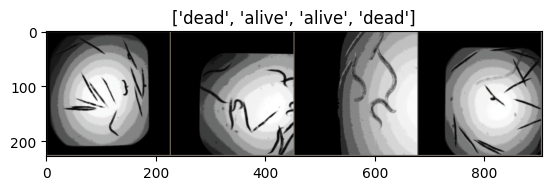

In [ ]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:4f}')

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model

In [ ]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2,2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]}')
                imshow(inputs.cpu().data[j])
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [ ]:
model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, 2)

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 68.1MB/s]


In [ ]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=8)

Epoch 0/7
----------
train Loss: 0.6191 Acc: 0.6622
val Loss: 0.4110 Acc: 0.6842

Epoch 1/7
----------
train Loss: 0.4115 Acc: 0.7703
val Loss: 0.0577 Acc: 1.0000

Epoch 2/7
----------
train Loss: 0.3420 Acc: 0.8514
val Loss: 0.1318 Acc: 0.9474

Epoch 3/7
----------
train Loss: 0.3504 Acc: 0.8243
val Loss: 0.0054 Acc: 1.0000

Epoch 4/7
----------
train Loss: 0.6260 Acc: 0.7703
val Loss: 0.0087 Acc: 1.0000

Epoch 5/7
----------
train Loss: 0.4744 Acc: 0.8649
val Loss: 0.0043 Acc: 1.0000

Epoch 6/7
----------
train Loss: 0.4621 Acc: 0.8378
val Loss: 0.0010 Acc: 1.0000

Epoch 7/7
----------
train Loss: 0.2466 Acc: 0.9189
val Loss: 0.0089 Acc: 1.0000

Training complete in 0m 18s
Best val Acc: 1.000000


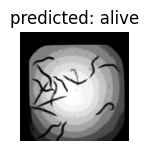

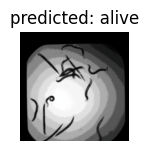

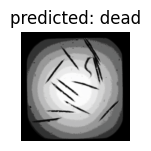

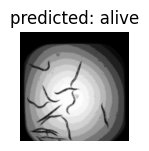

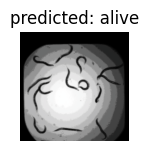

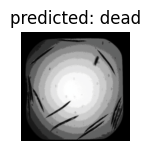

In [ ]:
visualize_model(model_ft)

### Transfer Learning

In [ ]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


train Loss: 0.5929 Acc: 0.6622
val Loss: 0.3742 Acc: 0.9474

Epoch 1/24
----------
train Loss: 0.5743 Acc: 0.7027
val Loss: 0.2513 Acc: 0.9474

Epoch 2/24
----------
train Loss: 0.4254 Acc: 0.8243
val Loss: 0.0701 Acc: 1.0000

Epoch 3/24
----------
train Loss: 0.5576 Acc: 0.7703
val Loss: 0.0758 Acc: 1.0000

Epoch 4/24
----------
train Loss: 0.3484 Acc: 0.8378
val Loss: 0.0737 Acc: 1.0000

Epoch 5/24
----------
train Loss: 0.3881 Acc: 0.7703
val Loss: 0.0719 Acc: 1.0000

Epoch 6/24
----------
train Loss: 0.5669 Acc: 0.7568
val Loss: 0.0249 Acc: 1.0000

Epoch 7/24
----------
train Loss: 0.3155 Acc: 0.9054
val Loss: 0.0227 Acc: 1.0000

Epoch 8/24
----------
train Loss: 0.3833 Acc: 0.8108
val Loss: 0.0497 Acc: 1.0000

Epoch 9/24
----------
train Loss: 0.2024 Acc: 0.9324
val Loss: 0.0212 Acc: 1.0000

Epoch 10/24
----------
train Loss: 0.4267 Acc: 0.8108
val Loss: 0.0168 Acc: 1.0000

Epoch 11/24
----------
train Loss: 0.3770 Acc: 0.8243
val Loss: 0.0353 Acc: 1.0000

Epoch 12/24
----------
t

## DBN
* Arquitectura apilada: Están compuestas por múltiples redes de creencia (belief networks) apiladas, formando una red neuronal profunda.
* Entrenamiento por capas: Cada red de creencia se entrena de forma no supervisada una capa a la vez, usando un algoritmo "greedy" de máxima verosimilitud.
Inicialización sensible: El pre-entrenamiento capa por capa proporciona una buena inicialización de pesos para el entrenamiento supervisado final.


* Capas superiores de asociación dirigidas.

* Composicionalidad: Las capas superiores capturan patrones compuestos de las capas inferiores.

* Aplicaciones: Reconocimiento de objetos, extracción de características, reducción de dimensionalidad, entre otras

# El problema de la búsqueda de arquitecturas.





Se denomina arquitectura a la topología, estructura o patrón de conexión de una red neuronal. En el caso de una red neuronal artificial como se discutió de manera previa las neuronas se concectan por medio de conexiones sinápticas.

Si bien se conocen arquitecturas usadas en diversas aplicaciones en muchas ocasiones cuando estas son usadas para una aplicación en particular es posible que estas mismas no funcionen de manera adecuada, de manera que es necesario en muchas ocasiones hacer modificaciones sobre las arquitecturas originales.

Por ejemplo, consideremos el caso de Resnet-18, una red neuronal con una estructura bien definida de una Red Neuronal Convolucional (CNN), si bien esta red es un estándar en la evaluación de algoritmos es importante mencionar que sus alcances son finitos y tiene limitaciones computacionales importantes debido al alto costo de las mismas.

¿Entonces qué hago si tengo una estructura de red que funciona pero no en mi caso de aplicación?

La respuesta es obvia, la altero, a estas alteraciones de alguna estructura en particular es a lo que se le conoce como búsqueda de arquitecturas y es una área activa de la inteligencia artificial.

Es importante mencionar además que buscar la arquitectura ideal de una red neuronal es un proceso extremadamente complicado pues las aproximaciones teóricas del Aprendizaje Profundo son inherentemente complicadas. En la actualidad la búsqueda de arquitecturas se hace mediante una gran variedad de métodos entre los que destacan algunos métodos metaheurísticos.

Esta búsqueda de arquitecturas tiene como objetivo decrementar el coste computacional de manera que las tareas de aprendizaje no solo tengan un menor coste a la par buscamos que las estructuras sean óptimas en la mejora de la precisión.

### Elementos de interés:
* Un survery de 2019 acerca de la búsqueda de arquitecturas en redes neuronales.

 https://jmlr.org/papers/volume20/18-598/18-598.pdf
* Un survey acerca de la búsqueda de arquitecturas mediante enfoques evolutivos:
 https://arxiv.org/pdf/2008.10937.pdf


## Alternativas en la optimización: Arquitectura de redes neuronales.

Como se ha discutido la búsqueda de estructuras de redes neuronales es un problema que consiste en llevar a cabo optimización, de esta manera hay una gran diversidad de acercamientos a la temática, en este curso comentaremos e implementaremos dos de ellos.

## Acercamiento Bayesiano.

* Se basa en la inferencia bayesiana para explorar el espacio de arquitecturas posibles.

* Modela la distribución de probabilidad posterior de las arquitecturas dadas las métricas de rendimiento observadas.
Utiliza técnicas como la optimización bayesiana secuencial para muestrear arquitecturas prometedoras de esta distribución posterior.

* Ejemplos: NASBOT, PNAS, OBAYESWANNAS.
Ventajas: Eficiente al aprovechar la información pasada, puede manejar espacios de búsqueda grandes.
Desventajas: Complejidad computacional, sensibilidad a los supuestos del modelo.

# Acercamiento Evolutivo (Concepto de Neuroevolución):

La neuroevolución es un enfoque que combina las redes neuronales artificiales con algoritmos evolutivos como los algoritmos genéticos. En lugar de entrenar las redes neuronales con métodos tradicionales de backpropagation, la neuroevolución busca evolucionar automáticamente la topología (arquitectura) y/o los pesos (parámetros) de la red neuronal.



* Inspirado en la evolución biológica y los algoritmos genéticos.
Codifica las arquitecturas como "genotipos" o representaciones simbólicas.

* Inicializa una población de arquitecturas y las evalúa según una función de aptitud (rendimiento).

* Aplica operadores genéticos como mutación, cruce y selección para evolucionar iterativamente hacia mejores arquitecturas.

* Ejemplos: AmoebaNet, HierarchicalEvolution, EnasNAS, DeepGA, GGA.

* Ventajas: Flexibilidad para explorar espacios complejos, escalabilidad.

* Desventajas: Costoso computacionalmente, convergencia lenta.

Para esta práctica usaremos dos enfoques, en ambos llevaremos a cabo la clasificación de CIFAR 10, un conjunto de datos usado comunmente para la clasificación de imágenes, el primer enfoque es un algoritmo diseñado a "mano", el segundo hará uso de un algoritmo en particular conocido como NEAT.

Para más información sobre el uso de NEAT considera hacer uso de la documentación oficial:

https://neat-python.readthedocs.io/en/latest/installation.html#

In [ ]:
%%capture
!pip install neat-python

In [ ]:
import neat
import numpy as np
import pickle
import torch
import torchvision
import torchvision.transforms as transforms
from sklearn.metrics import accuracy_score

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


100%|██████████| 170498071/170498071 [00:04<00:00, 37583107.90it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


In [ ]:
def eval_genomes(genomes, config):
    for genome_id, genome in genomes:
        net = neat.nn.FeedForwardNetwork.create(genome, config)

        total_correct = 0
        total_samples = 0

        for data in testloader:
            images, labels = data
            images = images.view(-1, 32 * 32 * 3)
            images = images.numpy()

            outputs = np.array([net.activate(img) for img in images])
            predicted_labels = np.argmax(outputs, axis=1)

            total_correct += np.sum(predicted_labels == labels.numpy())
            total_samples += len(labels)

        accuracy = total_correct / total_samples
        genome.fitness = accuracy

In [ ]:
!wget https://raw.githubusercontent.com/EisaacJC/Uk-CoursesMaterial./main/config-feedforward.cfg

--2024-04-15 13:34:06--  https://raw.githubusercontent.com/EisaacJC/Uk-CoursesMaterial./main/config-feedforward.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1695 (1.7K) [text/plain]
Saving to: ‘config-feedforward.cfg’

config-feedforward. 100%[===================>]   1.66K  --.-KB/s    in 0s      

2024-04-15 13:34:06 (23.5 MB/s) - ‘config-feedforward.cfg’ saved [1695/1695]



In [ ]:
config_path = "./config-feedforward.cfg"
config = neat.Config(neat.DefaultGenome, neat.DefaultReproduction,
                     neat.DefaultSpeciesSet, neat.DefaultStagnation,
                     config_path)


In [ ]:
config.pop_size = 10
config.processes = 1
pop = neat.Population(config)
pop.add_reporter(neat.StdOutReporter(True))
stats = neat.StatisticsReporter()
pop.add_reporter(stats)

In [ ]:
winner = pop.run(eval_genomes, 50)

In [ ]:
with open('winner_cifar10.pkl', 'wb') as f:
    pickle.dump(winner, f)

In [ ]:
total_correct = 0
total_samples = 0

for data in testloader:
    images, labels = data
    images = images.view(-1, 32 * 32 * 3)
    images = images.numpy()

    outputs = np.array([winner_net.activate(img) for img in images])
    predicted_labels = np.argmax(outputs, axis=1)

    total_correct += np.sum(predicted_labels == labels.numpy())
    total_samples += len(labels)

accuracy = total_correct / total_samples
print(f"Best Model Accuracy: {accuracy:.4f}")


# Referencias de interés científico/técnico:

1. Bergstra, J., & Bengio, Y. (2012). Random search for hyper-parameter optimization. Journal of Machine Learning Research, 13(Feb), 281-305.
https://www.deeplearningbook.org/

2. Goodfellow, I., Bengio, Y., & Courville, A. (2016). Deep Learning. MIT Press. https://www.jmlr.org/papers/volume13/bergstra12a/bergstra12a.pdf


TensorFlow/Keras:

1. Creación y entrenamiento de modelos de redes neuronales
2. Documentación oficial: Sequential model: https://www.tensorflow.org/guide/keras/sequential_model
3. Guía de inicio rápido: Beginner quickstart: https://www.tensorflow.org/tutorials/quickstart/beginner



## Artículos y aplicaciones de posible interés:

* Demo de las arquitecturas comentadas.
https://huggingface.co/spaces/pytorch/ResNet
https://huggingface.co/spaces/pytorch/AlexNet

* Visualizaciones de las redes neuronales:
https://playground.tensorflow.org/